# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

# Load the dataset

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Selection

In [7]:
target_col = "Outcome"
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols].copy()
y = df[target_col].copy()

print("Target column (dependent):", target_col)
print("Feature columns (independent):", feature_cols)

Target column (dependent): Outcome
Feature columns (independent): ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


 ## Split Data into Train and Test and Build Decision Tree

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Visualize the Decision Tree

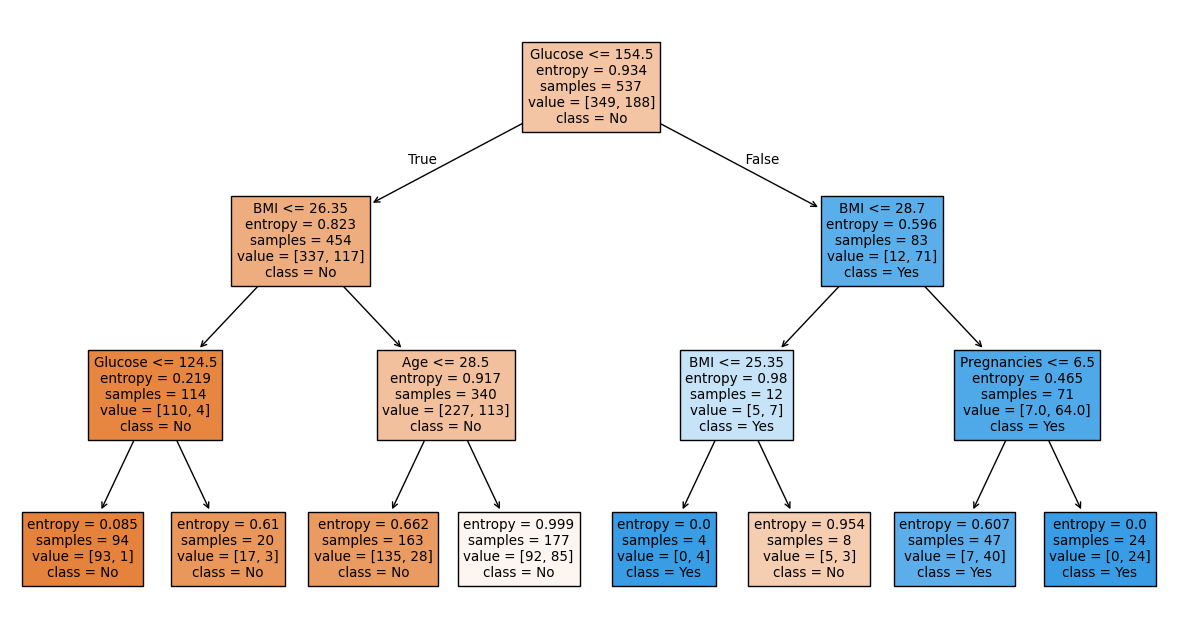

In [19]:
plt.figure(figsize=(15,8))
plot_tree(dt_entropy, feature_names=feature_cols, class_names=['No', 'Yes'], filled=True)
plt.show()

# Measuring Accuracy

In [20]:
from sklearn.metrics import accuracy_score
y_pred = dt_entropy.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7186147186147186


# How Entropy is calculated

In [21]:
def entropy(p):
    return -np.sum(p * np.log2(p + 1e-9))

p_yes = np.mean(y_train)
p_no = 1 - p_yes
entropy_parent = entropy(np.array([p_yes, p_no]))
print("Entropy of parent node:", entropy_parent)


Entropy of parent node: 0.9341511800114481


In [22]:
threshold = 120
left = y_train[X_train['Glucose'] <= threshold]
right = y_train[X_train['Glucose'] > threshold]

p_left = [np.mean(left), 1 - np.mean(left)]
p_right = [np.mean(right), 1 - np.mean(right)]

entropy_left = entropy(np.array(p_left))
entropy_right = entropy(np.array(p_right))

w_left = len(left) / len(y_train)
w_right = len(right) / len(y_train)

entropy_split = w_left * entropy_left + w_right * entropy_right
info_gain = entropy_parent - entropy_split

print("Information Gain for Glucose:", info_gain)

Information Gain for Glucose: 0.13255436623840278


# Decision tree For Criterion 'Gini'

In [25]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3 , random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

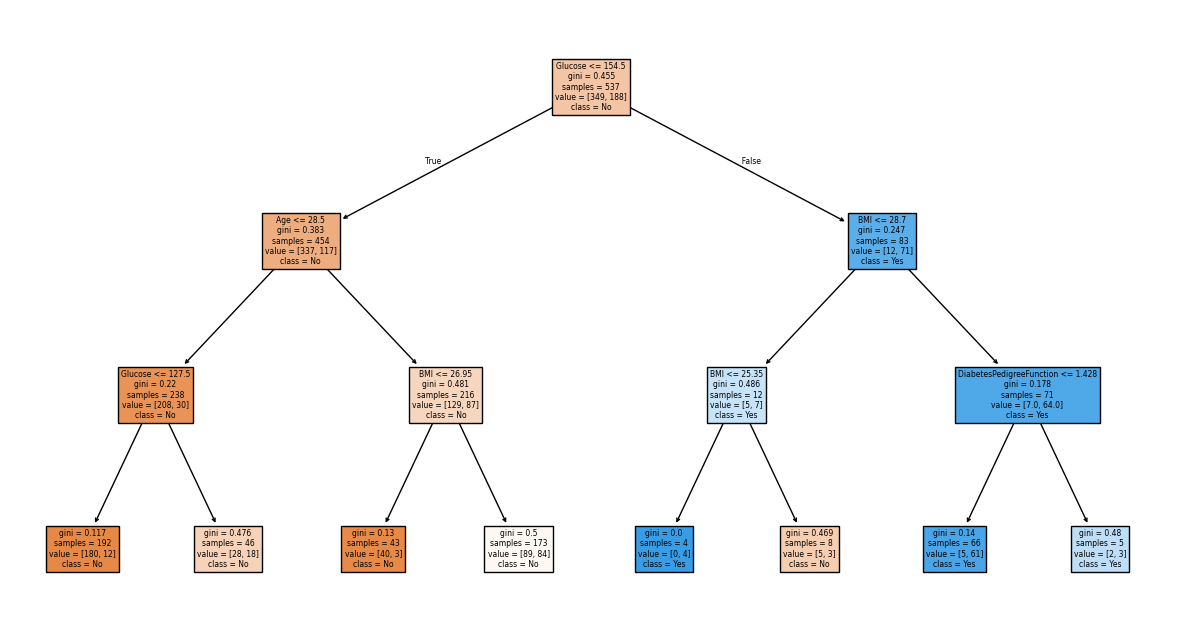

In [26]:
plt.figure(figsize=(15,8))
plot_tree(clf_gini, feature_names=feature_cols, class_names=['No', 'Yes'], filled=True)
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
y_pred = clf_gini.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7186147186147186


# How Gini is calculated

In [27]:
def gini(p):
    return 1 - np.sum(p**2)

gini_parent = gini(np.array([p_yes, p_no]))
gini_left = gini(np.array(p_left))
gini_right = gini(np.array(p_right))
gini_split = w_left * gini_left + w_right * gini_right
gini_gain = gini_parent - gini_split

print("Gini Index Reduction for Glucose:", gini_gain)

Gini Index Reduction for Glucose: 0.08141322188833089


Q) Why Glucose is Root?

Ans) Glucose was selected as the root node since it produced the highest reduction in impurity (both in terms of Information Gain and Gini Index). Both criteria resulted in similar accuracy and structure, confirming the robustness of the feature importance

Root Node: “Glucose” for both trees (since it gives max Information Gain / Gini reduction).

Accuracy: Both perform very similarly (71.8%).

Tree Depth & Shape: Almost identical, but some splits might differ deeper down.